### Load data

In [81]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/ML/HW2/classification_data.npy', allow_pickle=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


### 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [82]:
## Your code HERE
n1 = 0
n2 = 0
sum_x1 = 0
sum_x2 = 0
for i in range(x_train.shape[0]):
  if(y_train[i] == 0):
    n1 += 1
    sum_x1 += x_train[i]
  if(y_train[i] == 1):
    n2 += 1
    sum_x2 += x_train[i]
m1 = (1 / n1) * sum_x1
m2 = (1 / n2) * sum_x2
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


### 2. Compute the Within-class scatter matrix SW

In [83]:
## Your code HERE
sum_c1 = 0
sum_c2 = 0
for i in range(x_train.shape[0]):
  if(y_train[i] == 0):
    sum_c1 += (x_train[i] - m1) * (x_train[i] - m1).reshape(2,1)
  if(y_train[i] == 1):
    sum_c2 += (x_train[i] - m2) * (x_train[i] - m2).reshape(2,1)
sw = sum_c1 + sum_c2
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


### 3. Compute the Between-class scatter matrix SB

In [84]:
## Your code HERE
sb = (m2 - m1) * (m2 - m1).reshape(2,1)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


### 4. Compute the Fisher’s linear discriminant

In [85]:
## Your code HERE
w = np.dot(np.linalg.inv(sw), m2-m1)
w = w / np.linalg.norm(w)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [-0.37003809  0.92901658]


### 5. Project the test data by linear discriminant and get the class prediction by K nearest-neighbor rule. Please report the accuracy score with K values from 1 to 5

In [86]:
#you can use accuracy_score function from sklearn.metric.accuracy_score
def knn(x, y, k):
  pred = []
  for i in range(len(x)): #target
    distance = {}
    class0 = 0
    class1 = 0
    for j in range(len(x)): #index
      d = np.absolute(x[j] - x[i])
      distance[d] = j
    count = 0
    for key in sorted(distance.items()):
      if count == 0:
        count += 1
        continue
      if y[key[1]] == 0:
        class0 += 1
      else:
        class1 += 1
      if count > k:
        break
      count += 1
    if class0 > class1:
      pred.append(0)
    else:
      pred.append(1)
  return np.array(pred)

x_project = np.dot(x_test, w)
for i in range(1, 6, 1):
    accuracy = accuracy_score(y_test, knn(x_project, y_test, i))
    print(f"For K={i}, Accuracy of test-set {accuracy}")

For K=1, Accuracy of test-set 0.8496
For K=2, Accuracy of test-set 0.88
For K=3, Accuracy of test-set 0.8832
For K=4, Accuracy of test-set 0.9
For K=5, Accuracy of test-set 0.8864


### 6. Plot:
1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization)

2) colorize the data with each class

3) project all data points on your projection line. Your result should look like this image

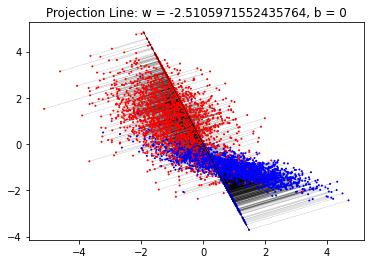

In [87]:
#1
x_train_projected = (np.dot(x_train, w)).reshape((3750, 1))
line = x_train_projected * w
slope = (line[1][1] - line[0][1]) / (line[1][0] - line[0][0])
intercept = 0
plt.title(f"Projection Line: w = {slope}, b = {intercept}")
plt.plot(line.transpose()[0], line.transpose()[1], c='k', zorder=2, linewidth=0.3)

#2
color = np.where(y_train == 1, 'r', 'b')
x_axis = []
y_axis = []
for i in range(len(x_train)):
  x_axis.append(x_train[i][0])
  y_axis.append(x_train[i][1])
plt.scatter(x_axis, y_axis, c=color, zorder=1, s=1)

#3
for i in range(len(x_train)):
  a = [line[i][0], x_train[i][0]]
  b = [line[i][1], x_train[i][1]]
  plt.plot(a, b, c='k', zorder=0, linewidth=0.1)

plt.scatter(line.transpose()[0], line.transpose()[1], c=color, zorder=1, s=1)

plt.show()